# 4.10 Coding Etiquette & Excel Reporting

## Part 3

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data frame
path = r'D:\02.2022_Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','merge_with_customer_profile.pkl'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 38 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   orders_day_of_week       int8   
 10  order_time_of_day        int8   
 11  days_since_prior_order   float16
 12  first_order              bool   
 13  product_id               int32  
 14  add_to_cart_order        int16  
 15  reordered                int8   
 16  product_name             object 
 17  aisle_id                 int8   
 18  department_id            int8   
 19  prices                   float16
 20  busiest_day              object 
 21  busies

In [5]:
# Remove unnecessary column
df = df.drop(columns = ['orders_day_of_week'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float16
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [7]:
df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                            mean  min   max
customer_profile                           
retired                 7.796875  1.0  25.0
single adult            7.785156  1.0  25.0
typical married parent  7.789062  1.0  25.0
young parent            7.796875  1.0  25.0

In [8]:
df.groupby('customer_profile_income').agg({'frequency': ['mean', 'min', 'max']})

frequency           
                                       mean  min   max
customer_profile_income                               
married, high income               9.812500  0.0  30.0
married, low income               10.656250  0.0  30.0
married, low/middle income         9.914062  0.0  30.0
married, middle/high income        9.968750  0.0  30.0
retired                            9.929688  0.0  30.0
single, high income                9.625000  0.0  30.0
single, low income                10.492188  0.0  30.0
single, low/middle income          9.968750  0.0  30.0
single, middle/high income         9.882812  0.0  30.0
young parent, high income          8.617188  2.0  30.0
young parent, low income          10.351562  0.0  30.0
young parent, low/middle income    9.750000  0.0  30.0
young parent, middle/high income  10.296875  1.0  30.0

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### (1) Compare customer profiles with regions

In [9]:
Cutomer_profile_region = pd.crosstab(df['region'],df['customer_profile'],dropna = False)

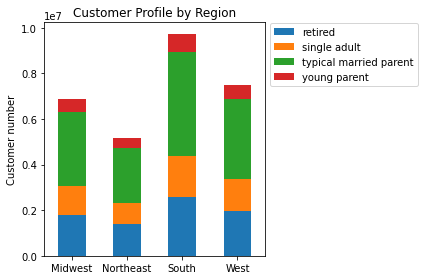

In [10]:
Cutomer_profile_region_bar = Cutomer_profile_region.plot(kind='bar',stacked = True, xlabel='',ylabel='Customer number', title='Customer Profile by Region', rot=0)
Cutomer_profile_region_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
Cutomer_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Cutomer_profile_region_bar.png'))

#### (2) Compare customer profiles with departments

In [11]:
popular_departments = df[df['Department Popularity']=='Top']

In [12]:
customer_vs_department= pd.crosstab(popular_departments['department'],popular_departments['customer_profile'],dropna = False)

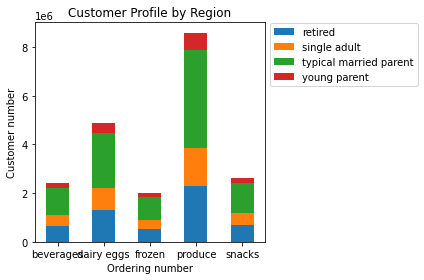

In [13]:
customer_vs_department_bar = customer_vs_department.plot(kind='bar',stacked = True, xlabel='',ylabel='Customer number', title='Customer Profile by Region', rot=0)
customer_vs_department_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.xlabel('Ordering number')
plt.tight_layout()
customer_vs_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_vs_department_bar.png'))

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

### Key Questions

#### 1. What are the busiest days of the week and hours of the day?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float16
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

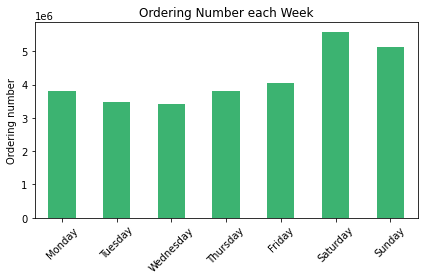

In [15]:
# Bar chart
Ordering_day_of_week_barh = df['ordering_day_of_week'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar(color = 'mediumseagreen',rot=45,title='Ordering Number each Week')
plt.ylabel("Ordering number")
plt.tight_layout()
Ordering_day_of_week_barh.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Ordering_day_of_week_barh.png'))

The busiest hours of the day are Saturday and Sunday.

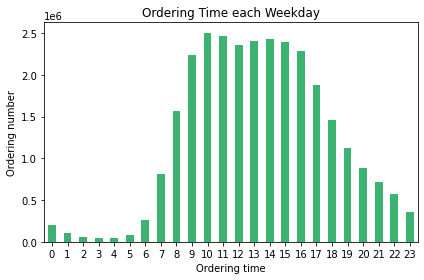

In [16]:
# Bar chart
Ordering_time_of_day_bar = df['order_time_of_day'].value_counts().sort_index().plot.bar(color = 'mediumseagreen',rot=0,title='Ordering Time each Weekday')
plt.xlabel("Ordering time")
plt.ylabel("Ordering number")
plt.tight_layout()
Ordering_time_of_day_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Ordering_time_of_day_bar.png'))

The busiest hours of the day are between 9-16.

#### 2. Are there particular times of the day when people spend the most money?

In [17]:
# Unristrict the maximal column display, so that I can see all the columns
pd.set_option('display.max_columns', None)

In [18]:
df.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,order_time_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,region,activity_flag,department,age_group,income_group,customer_profile,customer_profile_income,Department Popularity,ordering_day_of_week
0,26711,Female,Missouri,48,3,married,165665,2543867,5,9,30.0,False,196,2,0,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Sunday
1,26711,Female,Missouri,48,3,married,165665,1285508,7,15,11.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Thursday
2,26711,Female,Missouri,48,3,married,165665,2578584,8,15,10.0,False,196,2,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Sunday
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,11,30.0,False,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top,Friday
4,33890,Female,New Mexico,36,0,single,59285,474720,4,20,16.0,False,196,6,1,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top,Sunday


In [19]:
# Check the average price trend over time
price_hours = df.groupby('order_time_of_day').agg({'prices': ['mean']})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float16
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

In [21]:
# change data type to make the Inf values disppear and the real value show
df['prices'] = df['prices'].astype('float64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float64
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

In [23]:
# Check the summarized price trend over time
price_hours = df.groupby('order_time_of_day').agg({'prices': ['sum']})

In [24]:
print(price_hours)

                         prices
                            sum
order_time_of_day              
0                  1.534771e+06
1                  8.078928e+05
2                  4.812577e+05
3                  3.555314e+05
4                  3.688364e+05
5                  6.252114e+05
6                  2.079451e+06
7                  6.377049e+06
8                  1.221808e+07
9                  1.732555e+07
10                 1.939718e+07
11                 1.920017e+07
12                 1.837053e+07
13                 1.872347e+07
14                 1.895262e+07
15                 1.873101e+07
16                 1.781903e+07
17                 1.463923e+07
18                 1.143060e+07
19                 8.798815e+06
20                 6.851962e+06
21                 5.634154e+06
22                 4.480850e+06
23                 2.824061e+06


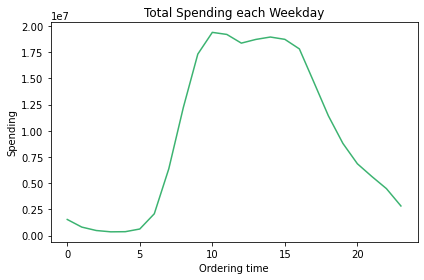

In [25]:
# Line chart
Mean_spending_per_hour_line = price_hours.plot.line(legend= False,color='mediumseagreen',xlabel='Ordering time',ylabel='Spending',title='Total Spending each Weekday')
plt.tight_layout()
Mean_spending_per_hour_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Mean_spending_per_hour_line.png'))

In [26]:
# Check the summarized trend over week
price_Week = df.groupby('ordering_day_of_week').agg({'prices': ['sum']})

In [27]:
print(price_Week)

                            prices
                               sum
ordering_day_of_week              
Friday                3.185235e+07
Monday                2.950802e+07
Saturday              4.389062e+07
Sunday                3.972843e+07
Thursday              2.959484e+07
Tuesday               2.688736e+07
Wednesday             2.656570e+07


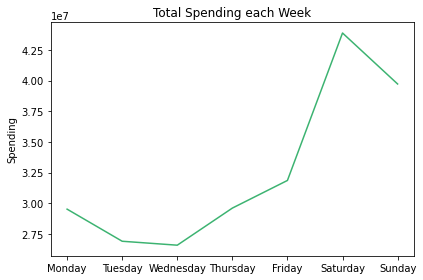

In [28]:
# LIne chart
Mean_spending_week_line = price_Week.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.line(legend= False,color='mediumseagreen',xlabel='',ylabel='Spending',title='Total Spending each Week')
plt.tight_layout()
Mean_spending_week_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Mean_spending_week_line.png'))

#### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float64
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

In [30]:
Prices = df['prices'].unique()

In [31]:
Prices.sort()

In [32]:
print(Prices)

[ 1.          1.09960938  1.20019531  1.29980469  1.40039062  1.5
  1.59960938  1.70019531  1.79980469  1.90039062  2.          2.09960938
  2.19921875  2.30078125  2.40039062  2.5         2.59960938  2.69921875
  2.80078125  2.90039062  3.          3.09960938  3.19921875  3.30078125
  3.40039062  3.5         3.59960938  3.69921875  3.80078125  3.90039062
  4.          4.1015625   4.19921875  4.30078125  4.3984375   4.5
  4.6015625   4.69921875  4.80078125  4.8984375   5.          5.1015625
  5.19921875  5.30078125  5.3984375   5.5         5.6015625   5.69921875
  5.80078125  5.8984375   6.          6.1015625   6.19921875  6.30078125
  6.3984375   6.5         6.6015625   6.69921875  6.80078125  6.8984375
  7.          7.1015625   7.19921875  7.30078125  7.3984375   7.5
  7.6015625   7.69921875  7.80078125  7.8984375   8.          8.1015625
  8.203125    8.296875    8.3984375   8.5         8.6015625   8.703125
  8.796875    8.8984375   9.          9.1015625   9.203125    9.296875
  9.39

Price range is between 1 and 25, which can be categorized in 5 groups. 

In [33]:
# Create price_range by loc functions
df.loc[(df['prices']>=1) & (df['prices']<=5),'price_range'] = '1-5 USD'
df.loc[(df['prices']>5) & (df['prices']<=10),'price_range'] = '5-10 USD'
df.loc[(df['prices']>10) & (df['prices']<=15),'price_range'] = '10-15 USD'
df.loc[(df['prices']>15),'price_range'] = '> 15 USD'

In [34]:
df.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,order_time_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,region,activity_flag,department,age_group,income_group,customer_profile,customer_profile_income,Department Popularity,ordering_day_of_week,price_range
0,26711,Female,Missouri,48,3,married,165665,2543867,5,9,30.0,False,196,2,0,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Sunday,5-10 USD
1,26711,Female,Missouri,48,3,married,165665,1285508,7,15,11.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Thursday,5-10 USD
2,26711,Female,Missouri,48,3,married,165665,2578584,8,15,10.0,False,196,2,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Sunday,5-10 USD
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,11,30.0,False,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top,Friday,5-10 USD
4,33890,Female,New Mexico,36,0,single,59285,474720,4,20,16.0,False,196,6,1,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top,Sunday,5-10 USD


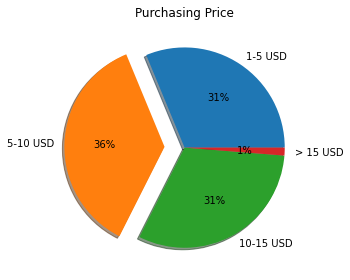

In [35]:
# Bar chart
myexplode = [0, 0.2, 0,0]
price_range_pie = df['price_range'].value_counts().loc[['1-5 USD','5-10 USD','10-15 USD','> 15 USD']].plot(kind='pie',startangle=0,autopct = '%1.0f%%',shadow=True,ylabel='',explode=myexplode, title='Purchasing Price')
plt.tight_layout()
price_range_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'price_range_pie.png'))

#### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [36]:
# Import libraries
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

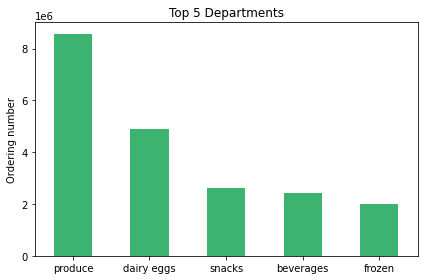

In [37]:
# Bar chart
Popularity_of_products_barh = popular_departments['department'].value_counts().sort_values(ascending = False).plot.bar(color = 'mediumseagreen',title = 'Top 5 Departments',rot=0)
plt.ylabel("Ordering number")
plt.tight_layout()
Popularity_of_products_barh.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Popularity_of_products_barh.png'))

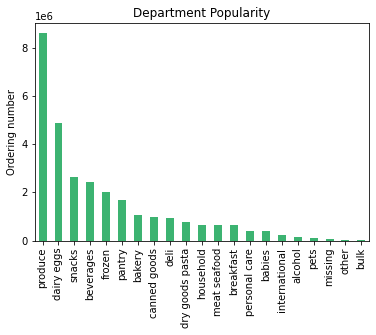

In [38]:
# Bar chart
Popularity_departments_bar = df['department'].value_counts().sort_values(ascending = False).plot.bar(color = 'mediumseagreen',title = 'Department Popularity')
plt.ylabel("Ordering number")

Popularity_departments_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Popularity_departments_bar.png'))

#### 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 38 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float64
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

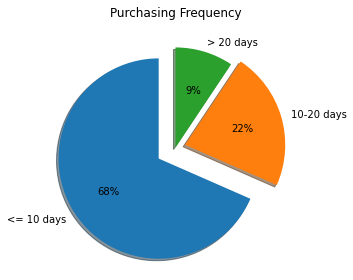

In [40]:
# Pie Chart
myexplode = [0.2, 0.1, 0]
mylabels = ['<= 10 days','10-20 days','> 20 days']
Frequency_pie = df['frequency_flag'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='',explode=myexplode,labels=mylabels, title='Purchasing Frequency')
plt.tight_layout()
Frequency_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Frequency_pie.png'))

#### 6. Are there differences in ordering habits based on a customer’s loyalty status?

In [41]:
# Crosstab of loyalty_flag and frequency_flag
Ordering_vs_loyalty = pd.crosstab(df['loyalty_flag'],df['frequency_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

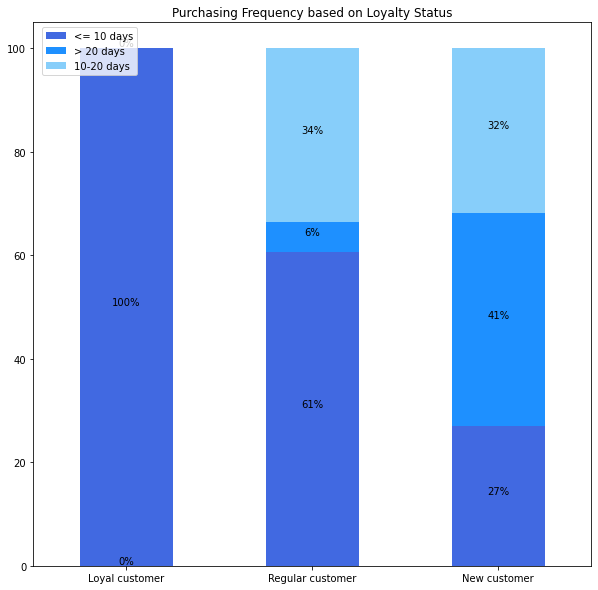

In [42]:
# 100% Stacked bar chart
pal = ["royalblue", "dodgerblue", "lightskyblue"]
Ordering_vs_loyalty_bar = Ordering_vs_loyalty.loc[['Loyal customer','Regular customer','New customer']].plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Frequency based on Loyalty Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["<= 10 days", "> 20 days",'10-20 days'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Ordering_vs_loyalty_bar.patches:
    height = rec.get_height()
    Ordering_vs_loyalty_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Ordering_vs_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Ordering_vs_loyalty_bar.png'))

Loyalty_flag is categorized based on their maximal order number. > 40 would be categorized as loyal customer while <= 10 woule be categorized as new customer. The blue part in regular customer indicates these customer could possibly turn to loyal customer in the long run, since they purchase every 10 days and their maximal orders are between 10-40 orders. It is only time that they would turn into loyal customers. 

In [43]:
# Crosstab of loyalty_flag and price_range
Price_vs_loyalty = pd.crosstab(df['loyalty_flag'],df['price_range'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

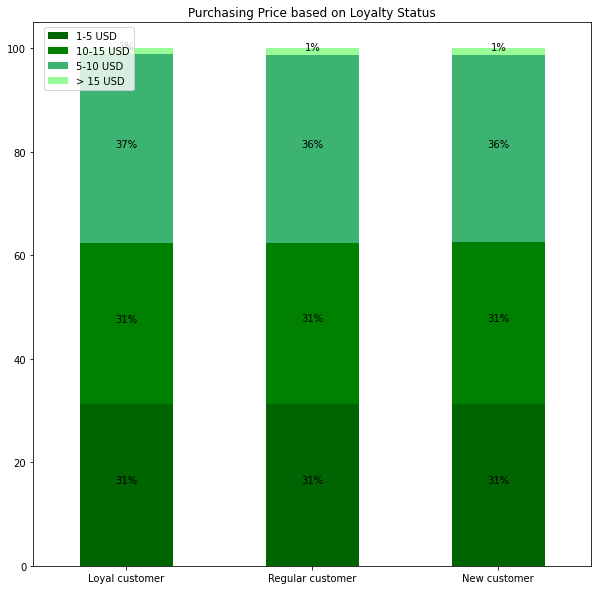

In [44]:
# 100% Stacked bar chart
pal = ["darkgreen", 'green',"mediumseagreen",'palegreen']
Price_vs_loyalty_bar = Price_vs_loyalty.loc[['Loyal customer','Regular customer','New customer']].plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Price based on Loyalty Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Price_vs_loyalty_bar.patches:
    height = rec.get_height()
    Price_vs_loyalty_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Price_vs_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Price_vs_loyalty_bar.png'))

In [45]:
Total_spending = df.groupby('loyalty_flag').agg({'prices': ['sum']})

In [46]:
Total_spending

,prices
,sum
loyalty_flag,
Loyal customer,7.546694e+07
New customer,3.544284e+07
Regular customer,1.171175e+08


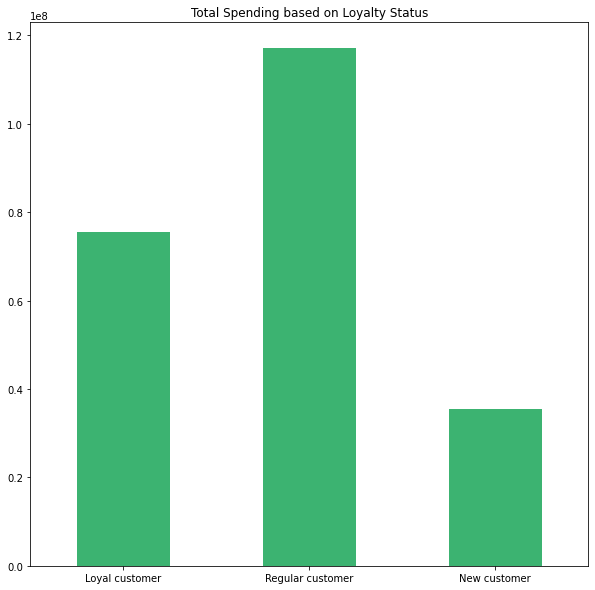

In [47]:
# Bar chart
Total_spending_bar = Total_spending.loc[['Loyal customer','Regular customer','New customer']].plot.bar(figsize=(10,10), stacked=True, rot=0,color = ['mediumseagreen'], title='Total Spending based on Loyalty Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
Total_spending_bar.get_legend().remove()
    
plt.show()
Total_spending_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Total_spending_bar.png'))

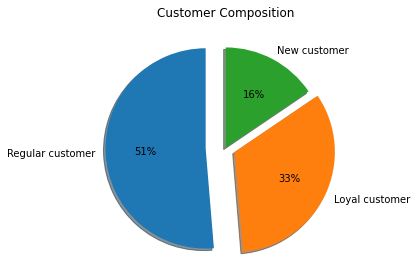

In [48]:
# Pie chart
myexplode = [0.2, 0.1, 0]
Loyalty_pie = df['loyalty_flag'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='',explode=myexplode, title='Customer Composition')
plt.tight_layout()
Loyalty_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'loyalty_pie.png'))

#### 7. Are there differences in ordering habits based on a customer’s region?

In [49]:
# Crosstab of region and loyalty_flag
Loyalty_regions = pd.crosstab(df['region'],df['loyalty_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

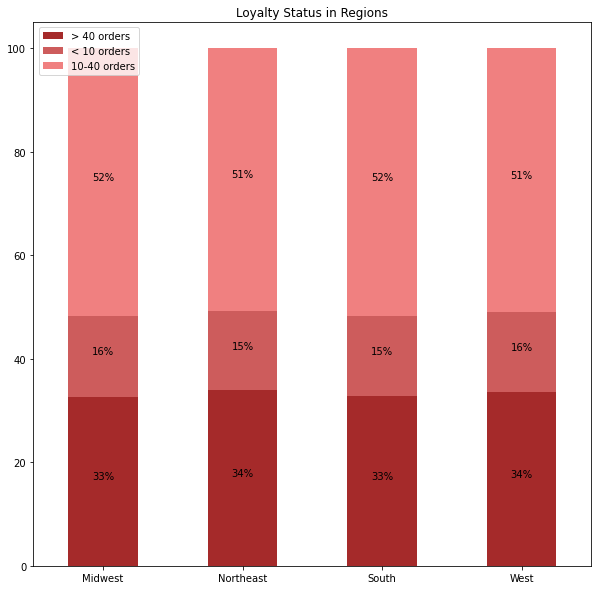

In [50]:
# 100% stacked bar chart
pal = ["brown", "indianred", "lightcoral"]
Loyalty_regions_bar = Loyalty_regions.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Loyalty Status in Regions')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["> 40 orders", "< 10 orders",'10-40 orders'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Loyalty_regions_bar.patches:
    height = rec.get_height()
    Loyalty_regions_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Loyalty_regions_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Loyalty_regions_bar.png'))

In [51]:
# Crosstab of region and frequency_flag
Orderinghabit_region= pd.crosstab(df['region'],df['frequency_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

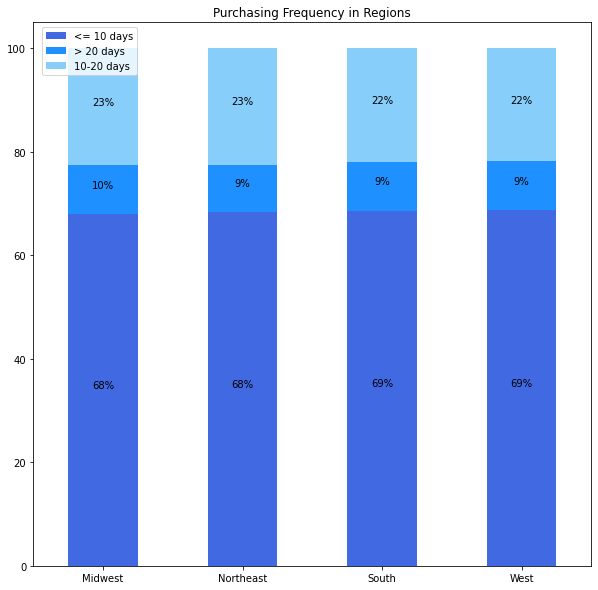

In [52]:
# 100% stacked bar chart
pal = ["royalblue", "dodgerblue", "lightskyblue"]
Orderinghabit_region_bar = Orderinghabit_region.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Frequency in Regions')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["<= 10 days", "> 20 days",'10-20 days'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Orderinghabit_region_bar.patches:
    height = rec.get_height()
    Orderinghabit_region_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Orderinghabit_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Orderinghabit_region_bar.png'))

In [53]:
Total_spending_regions= df.groupby('region').agg({'prices': ['sum']})

In [54]:
Total_spending_regions.to_clipboard()

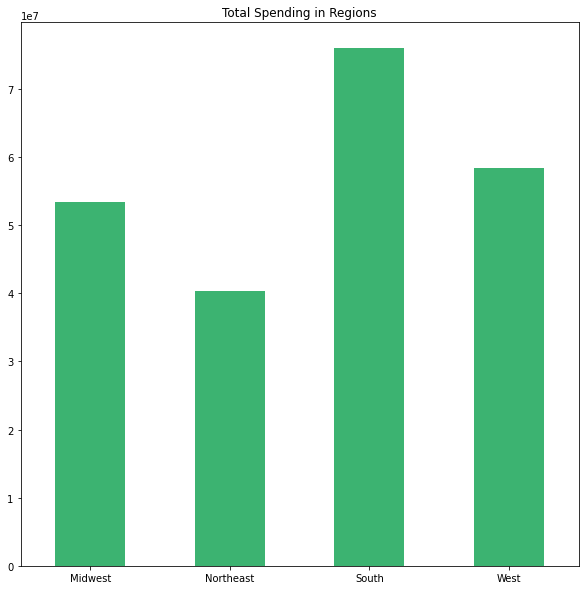

In [55]:
# Bar chart
Total_spending_regions_bar = Total_spending_regions.plot.bar(figsize=(10,10), stacked=True, rot=0,color = ['mediumseagreen'], title='Total Spending in Regions')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
Total_spending_regions_bar.get_legend().remove()
    
plt.show()
Total_spending_regions_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Total_spending_regions_bar.png'))

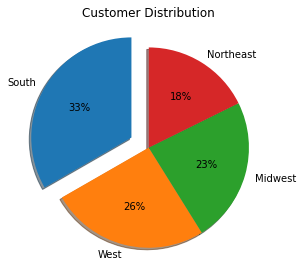

In [56]:
# Pie chart
myexplode = [0.2, 0, 0,0]
Region_pie = df['region'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='',explode=myexplode, title='Customer Distribution')
plt.tight_layout()
Region_pie .figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Region_pie.png'))

#### 8. Is there a connection between age and family status in terms of ordering habits?

##### Age in terms of ordering habits

In [57]:
# Crosstab of age_group and frequency_flag
Age_orderinghabit = pd.crosstab(df['age_group'],df['frequency_flag'],dropna= False).apply(lambda r: r/r.sum()*100, axis=1)

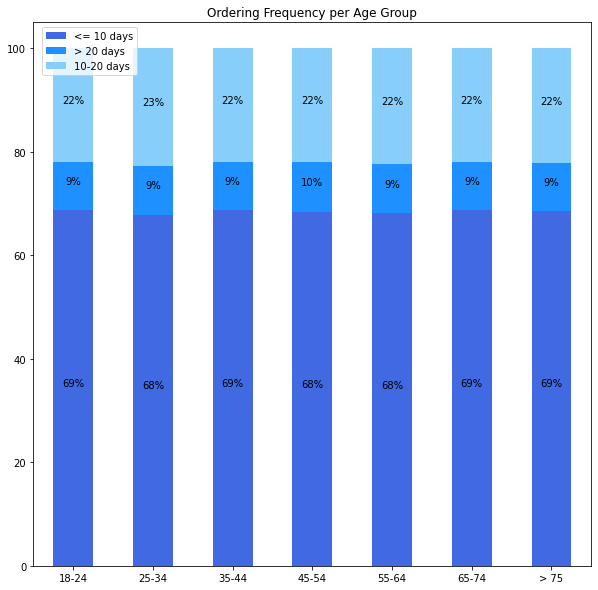

In [58]:
# 100% stacked bar chart
pal = ["royalblue", "dodgerblue", "lightskyblue"]
Age_orderinghabit_bar = Age_orderinghabit.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Ordering Frequency per Age Group')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["<= 10 days", "> 20 days",'10-20 days'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Age_orderinghabit_bar.patches:
    height = rec.get_height()
    Age_orderinghabit_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Age_orderinghabit_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Age_orderinghabit_bar.png'))

In [59]:
# Crosstab of age_group and loyalty_flag
Age_loyalty = pd.crosstab(df['age_group'],df['loyalty_flag'],dropna= False).apply(lambda r: r/r.sum()*100, axis=1)

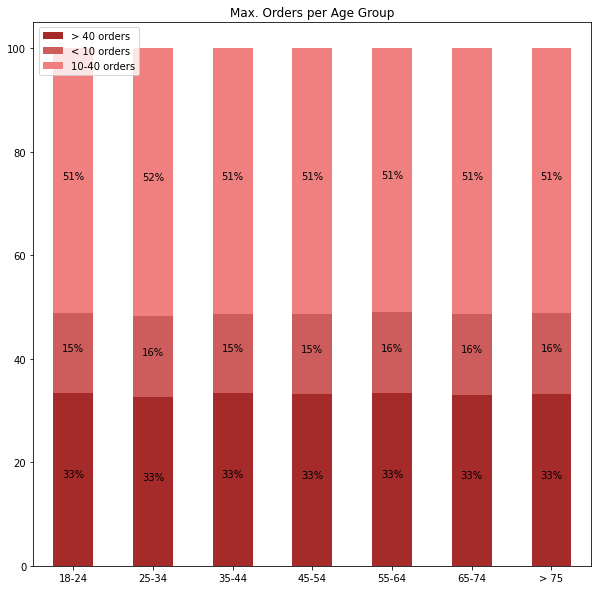

In [60]:
# 100% stacked bar chart
pal = ["brown", "indianred", "lightcoral"]
Age_loyalty_bar = Age_loyalty.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Max. Orders per Age Group')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["> 40 orders", "< 10 orders",'10-40 orders'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Age_loyalty_bar.patches:
    height = rec.get_height()
    Age_loyalty_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Age_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Age_loyalty_bar.png'))

In [61]:
# Crosstab of age_group and price_range
Price_age = pd.crosstab(df['age_group'],df['price_range'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

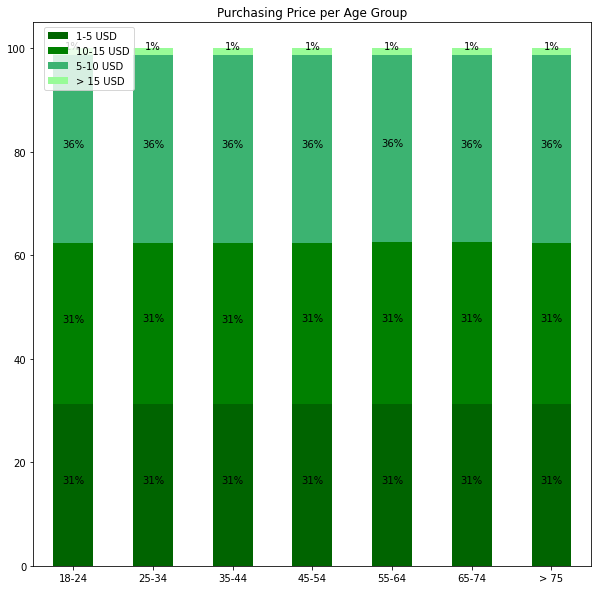

In [62]:
# 100% stacked bar chart
pal = ["darkgreen", 'green',"mediumseagreen",'palegreen']
Price_age_bar = Price_age.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Price per Age Group')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Price_age_bar.patches:
    height = rec.get_height()
    Price_age_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Price_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Price_age_bar.png'))

##### family status in terms of ordering habits

In [63]:
# Crosstab of family_status and frequency_flag
Family_status_orderinghabit = pd.crosstab(df['family_status'],df['frequency_flag'],dropna= False).apply(lambda r: r/r.sum()*100, axis=1)

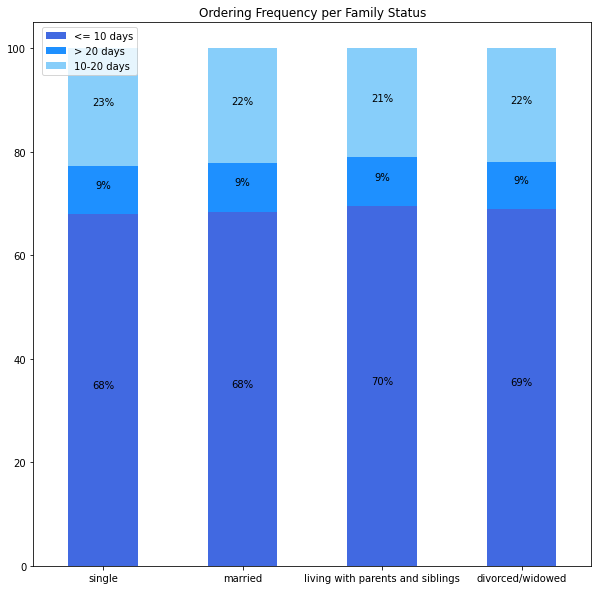

In [64]:
# 100% stacked bar chart
pal = ["royalblue", "dodgerblue", "lightskyblue"]
Family_status_orderinghabit_bar = Family_status_orderinghabit.loc[['single','married','living with parents and siblings','divorced/widowed']].plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Ordering Frequency per Family Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["<= 10 days", "> 20 days",'10-20 days'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Family_status_orderinghabit_bar.patches:
    height = rec.get_height()
    Family_status_orderinghabit_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Family_status_orderinghabit_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Family_status_orderinghabit_bar.png'))

In [65]:
# Crosstab of family_status and loyalty_flag
family_status_loyalty = pd.crosstab(df['family_status'],df['loyalty_flag'],dropna= False).apply(lambda r: r/r.sum()*100, axis=1)

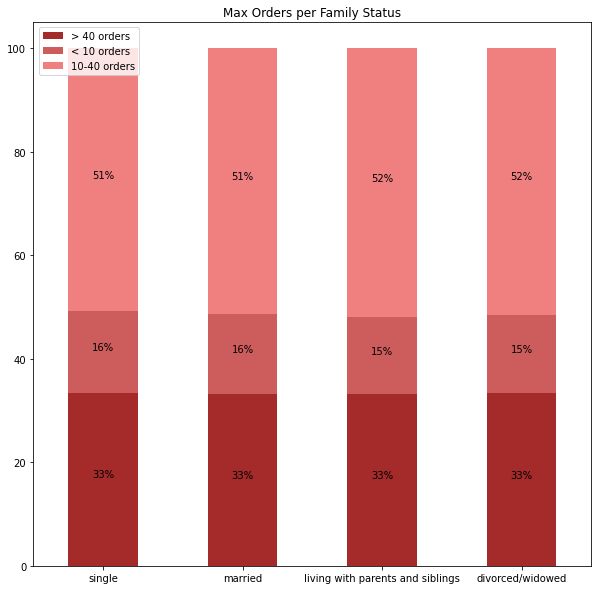

In [66]:
# 100% stacked bar chart
pal = ["brown", "indianred", "lightcoral"]
family_status_loyalty_bar = family_status_loyalty.loc[['single','married','living with parents and siblings','divorced/widowed']].plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Max Orders per Family Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["> 40 orders", "< 10 orders",'10-40 orders'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in family_status_loyalty_bar.patches:
    height = rec.get_height()
    family_status_loyalty_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
family_status_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'family_status_loyalty_bar.png'))

In [67]:
# Crosstab of family_status and price_range
Price_family = pd.crosstab(df['family_status'],df['price_range'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

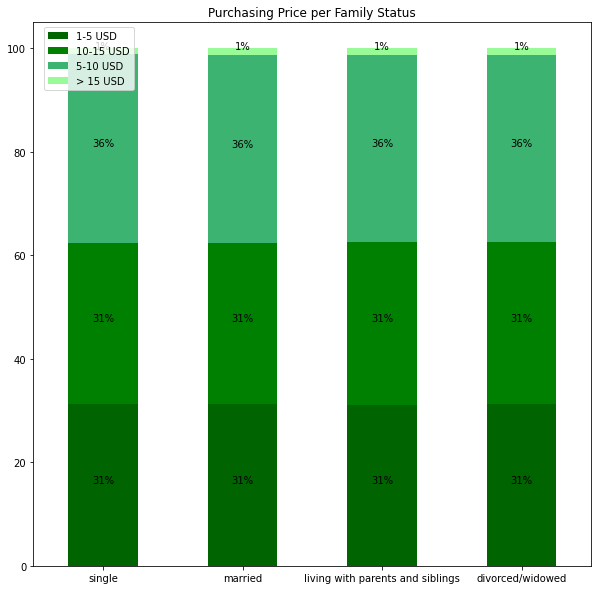

In [68]:
# 100% stacked bar chart
pal = ["darkgreen", 'green',"mediumseagreen",'palegreen']
Price_family_bar = Price_family.loc[['single','married','living with parents and siblings','divorced/widowed']].plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Price per Family Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Price_family_bar.patches:
    height = rec.get_height()
    Price_family_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Price_family_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Price_family_bar.png'))

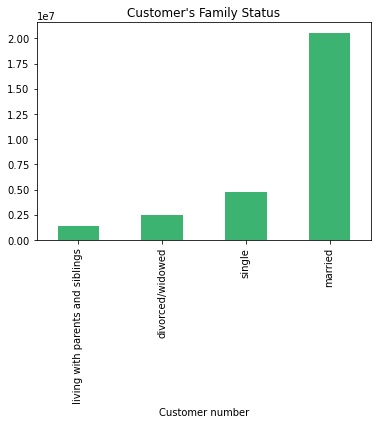

In [69]:
# Bar chart
Famil_status_barh = df['family_status'].value_counts().sort_values(ascending=True).plot.bar(color=['mediumseagreen'])

Famil_status_barh.set_title("Customer's Family Status")
plt.xlabel("Customer number")
plt.ylabel("")


Famil_status_barh.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'famil_status_barh.png'))

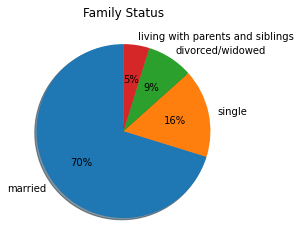

In [70]:
# Pie chart
family_status_pie = df['family_status'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='', title='Family Status')

family_status_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'family_status_pie.png'))

#### 9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 38 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  int32  
 1   gender                   object 
 2   state                    object 
 3   age                      int8   
 4   n_dependants             int8   
 5   family_status            object 
 6   income                   int32  
 7   order_id                 int32  
 8   order_number             int8   
 9   order_time_of_day        int8   
 10  days_since_prior_order   float16
 11  first_order              bool   
 12  product_id               int32  
 13  add_to_cart_order        int16  
 14  reordered                int8   
 15  product_name             object 
 16  aisle_id                 int8   
 17  department_id            int8   
 18  prices                   float64
 19  busiest_day              object 
 20  busiest_days             object 
 21  busies

##### Age vs Certain types of goods

In [72]:
# Crosstab of age_group and department
Age_department = pd.crosstab(popular_departments['age_group'],popular_departments['department'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

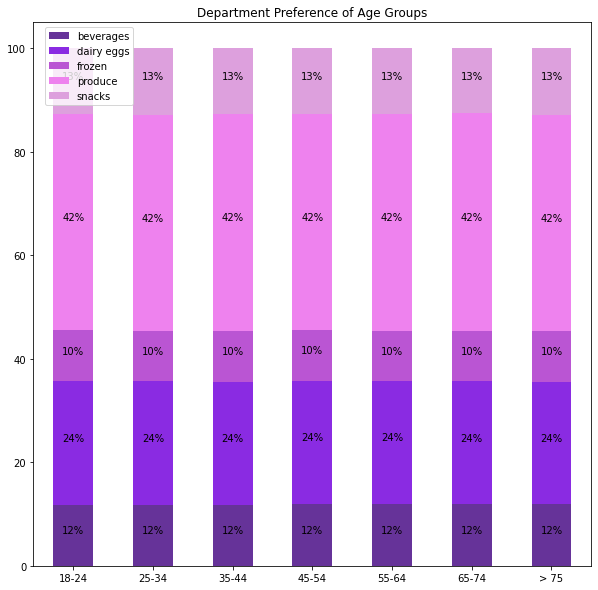

In [73]:
# 100% stacked bar chart
pal = ["rebeccapurple", 'blueviolet','mediumorchid',"violet",'plum']
Age_department_bar = Age_department.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Department Preference of Age Groups')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0))
for rec in Age_department_bar.patches:
    height = rec.get_height()
    Age_department_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Age_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Age_department_bar.png'))

##### Income vs Ordering habit

In [74]:
# Crosstab of income_group and frequency_flag
Income_Orderinghabit = pd.crosstab(df['income_group'],df['frequency_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

In [75]:
# Import libraries
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

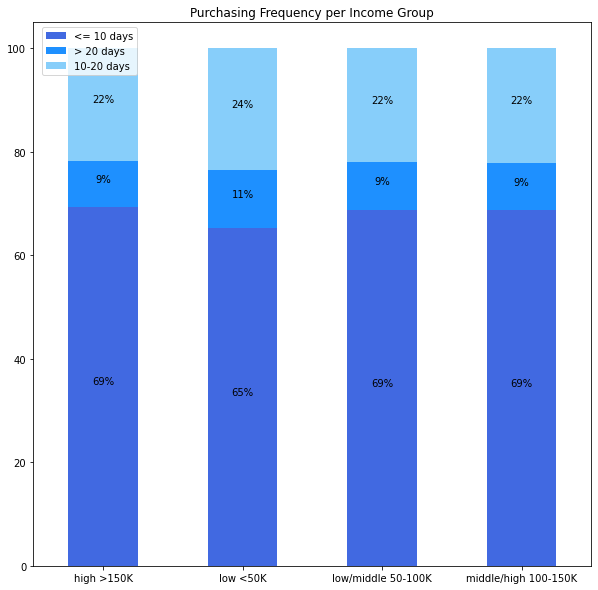

In [76]:
# 100% stacked bar chart
pal = ["royalblue", "dodgerblue", "lightskyblue"]
Income_Orderinghabit_bar = Income_Orderinghabit.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Frequency per Income Group')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["<= 10 days", "> 20 days",'10-20 days'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Income_Orderinghabit_bar.patches:
    height = rec.get_height()
    Income_Orderinghabit_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Income_Orderinghabit_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Income_Orderinghabit_bar.png'))

In [77]:
# Crosstab of income_group and loyalty_flag
Income_loyalty = pd.crosstab(df['income_group'],df['loyalty_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

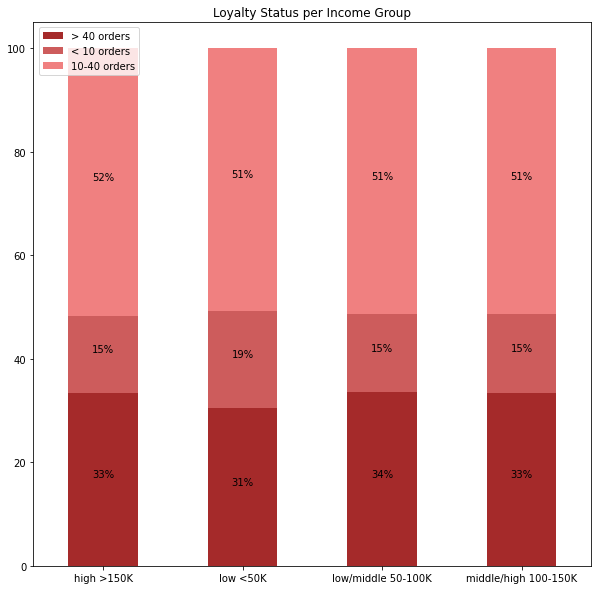

In [78]:
# 100% stacked bar chart
pal = ["brown", "indianred", "lightcoral"]
Income_loyalty_bar = Income_loyalty.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Loyalty Status per Income Group')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["> 40 orders", "< 10 orders",'10-40 orders'],loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Income_loyalty_bar.patches:
    height = rec.get_height()
    Income_loyalty_bar .text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Income_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Income_loyalty_bar.png'))

##### Income vs Certain types of goods

In [79]:
# Crosstab of income_group and department
Income_department = pd.crosstab(popular_departments['income_group'],popular_departments['department'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

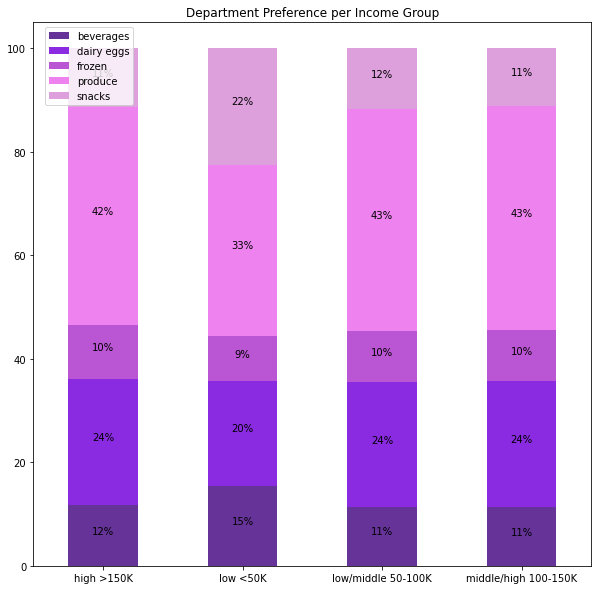

In [80]:
# 100% stacked bar chart
pal = ["rebeccapurple", 'blueviolet','mediumorchid',"violet",'plum']
Income_department_bar = Income_department.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Department Preference per Income Group')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Income_department_bar.patches:
    height = rec.get_height()
    Income_department_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Income_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Income_department_bar.png'))

##### Family status vs Certain types of goods

In [81]:
# Crosstab of family_status and department
Family_status_department = pd.crosstab(popular_departments['family_status'],popular_departments['department'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

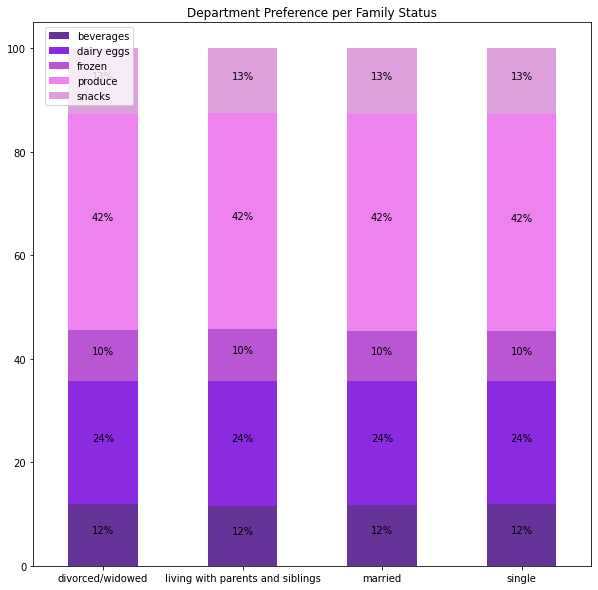

In [82]:
# 100% stacked bar chart
pal = ["rebeccapurple", 'blueviolet','mediumorchid',"violet",'plum']
Family_status_department_bar = Family_status_department.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Department Preference per Family Status')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in Family_status_department_bar.patches:
    height = rec.get_height()
    Family_status_department_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Family_status_department_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Department Preference_bar.png'))

#### 10. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think   of.

##### Frequency of orders

In [83]:
# Crosstab of customer_profile and frequency_flag
Customerprofile_frequency= pd.crosstab(df['customer_profile'],df['frequency_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

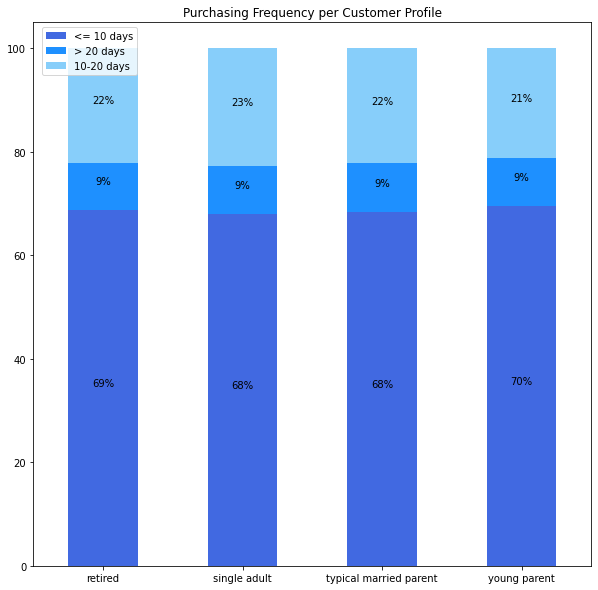

In [84]:
# 100% stacked bar chart
pal = ["royalblue", "dodgerblue", "lightskyblue"]
Customerprofile_frequency_bar = Customerprofile_frequency.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Purchasing Frequency per Customer Profile')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["<= 10 days", "> 20 days",'10-20 days'],loc='upper center', bbox_to_anchor=(0.1, 1.0))
for rec in Customerprofile_frequency_bar.patches:
    height = rec.get_height()
    Customerprofile_frequency_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Customerprofile_frequency_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Customerprofile_frequency_bar.png'))

##### Max order number

In [85]:
# Crosstab of customer_profile and loyalty_flag
Customerprofile_loyalty= pd.crosstab(df['customer_profile'],df['loyalty_flag'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

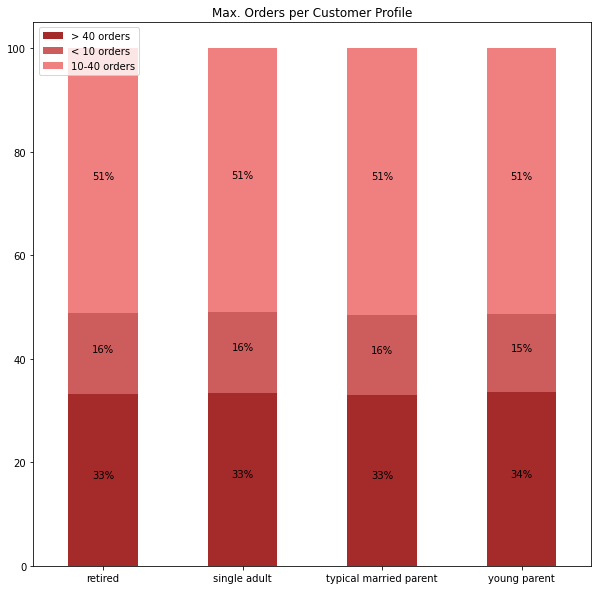

In [86]:
# 100% stacked bar chart
pal = ["brown", "indianred", "lightcoral"]
Customerprofile_loyalty_bar = Customerprofile_loyalty.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Max. Orders per Customer Profile')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(["> 40 orders", "< 10 orders",'10-40 orders'],loc='upper center', bbox_to_anchor=(0.1, 1.0))
for rec in Customerprofile_loyalty_bar.patches:
    height = rec.get_height()
    Customerprofile_loyalty_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Customerprofile_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Customerprofile_loyalty_bar.png'))

##### Price of orders

In [87]:
# Crosstab of customer_profile and price_range
Customerprofile_price= pd.crosstab(df['customer_profile'],df['price_range'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

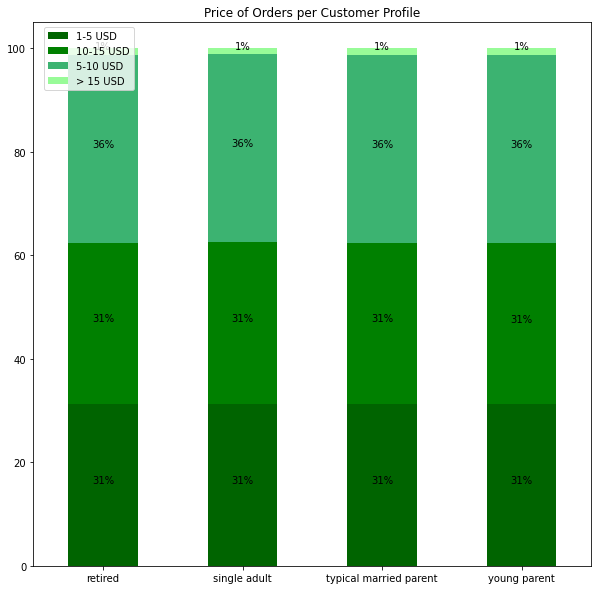

In [88]:
# 100% stacked bar chart
pal = ["darkgreen", 'green',"mediumseagreen",'palegreen']
Customerprofile_price_bar = Customerprofile_price.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Price of Orders per Customer Profile')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0))
for rec in Customerprofile_price_bar.patches:
    height = rec.get_height()
    Customerprofile_price_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Customerprofile_price_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Customerprofile_price_bar_bar.png'))

#####  Products customers are ordering

In [89]:
# Crosstab of customer_profile and department
Customerprofile_deparment= pd.crosstab(popular_departments['customer_profile'],popular_departments['department'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

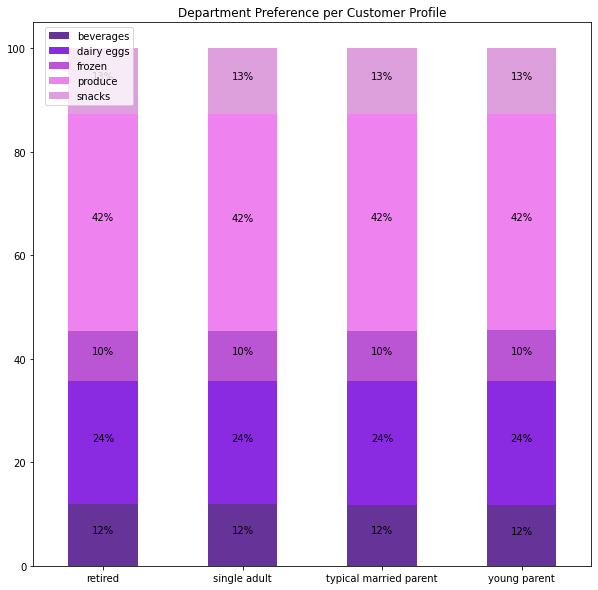

In [90]:
# 100% stacked bar chart
pal = ["rebeccapurple", 'blueviolet','mediumorchid',"violet",'plum']
Customerprofile_deparment_bar = Customerprofile_deparment.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Department Preference per Customer Profile')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0))
for rec in Customerprofile_deparment_bar.patches:
    height = rec.get_height()
    Customerprofile_deparment_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Customerprofile_deparment_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Customerprofile_deparment_bar.png'))

In [91]:
# Crosstab of customer_profile_income and department
Customerprofile_income_deparment= pd.crosstab(popular_departments['customer_profile_income'],popular_departments['department'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

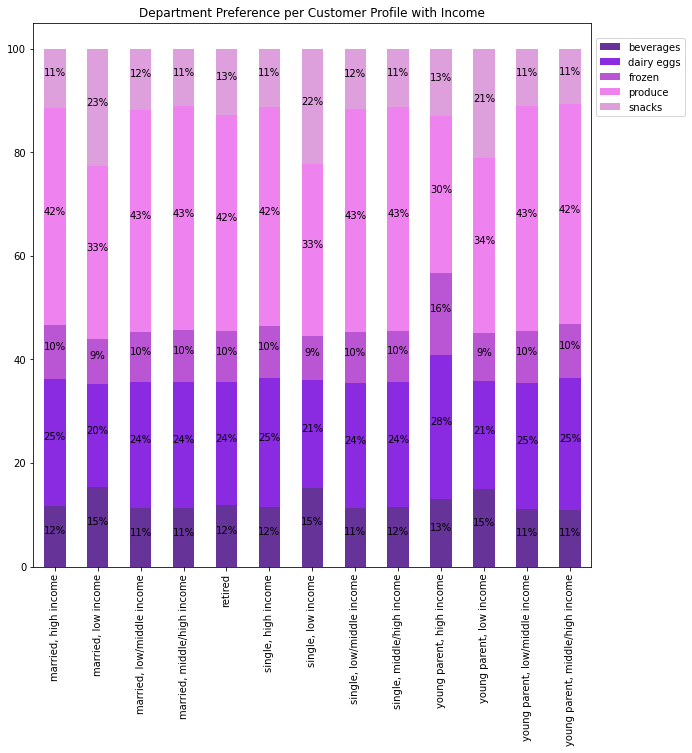

In [92]:
# 100% stacked bar chart
pal = ["rebeccapurple", 'blueviolet','mediumorchid',"violet",'plum']
Customerprofile_income_deparment_bar =Customerprofile_income_deparment.plot.bar(figsize=(10,10), stacked=True, rot=90,color = pal, title='Department Preference per Customer Profile with Income')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

for rec in Customerprofile_income_deparment_bar.patches:
    height = rec.get_height()
    Customerprofile_income_deparment_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
Customerprofile_income_deparment_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Customerprofile_income_deparment_bar.png'))

In [93]:
# Crosstab of department and price_range
test= pd.crosstab(popular_departments['department'],df['price_range'],dropna = False).apply(lambda r: r/r.sum()*100, axis=1)

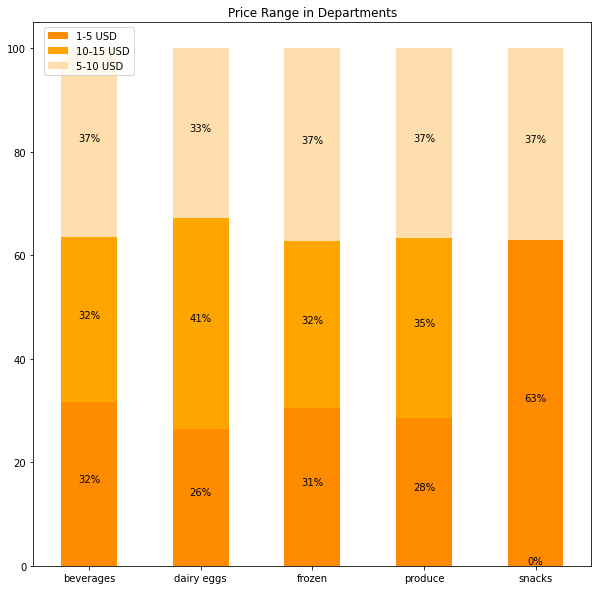

In [94]:
# 100% stacked bar chart
pal = ["darkorange", 'orange','navajowhite','oldlace']
test_bar =test.plot.bar(figsize=(10,10), stacked=True, rot=0,color = pal, title='Price Range in Departments')
plt.legend(title="")

plt.xlabel("")
plt.ylabel("")
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1))
for rec in test_bar.patches:
    height = rec.get_height()
    test_bar.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()
test_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Price Range in Departments_bar.png'))